In [ ]:
require(mgcv)
require(itsadug)
require(readr)
require(dplyr)
require(ggplot2)
require(showtext)
require(RColorBrewer)
showtext_auto()

In [2]:
popt = function(w,h,r){
    options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r)
}

In [ ]:
data_raw = read_csv("../../data/casper/cadet_JanMay.csv")
data_amy = read_csv("../../data/casper/byseed/det_dfr_14_cht_pricingPlan.csv")
data_evelyn = read_csv("../../data/casper/byseed/Evelyn_seedsent.csv")

In [ ]:
names(data_amy)

In [12]:
data_1 = data_amy %>% select(-c(seeds_list, seeds_prob, maxseed_id)) %>% rename(seed = maxseed) %>% relocate(rating, .after=seed)

In [22]:
names(data_1)
nrow(data_1)

[1] "opid"      "year"      "woy"       "ts"        "source"    "entity"   
 [7] "category"  "attribute" "text"      "seed"      "rating"

[1] 4466

In [21]:
names(data_evelyn)
nrow(data_evelyn)

[1] "opid"      "year"      "woy"       "source"    "entity"    "category" 
 [7] "attribute" "seed"      "text"      "rating"

[1] 26047

In [39]:
data = data_1 %>% bind_rows(data_evelyn)

In [40]:
names(data)
nrow(data)

[1] "opid"      "year"      "woy"       "ts"        "source"    "entity"   
 [7] "category"  "attribute" "text"      "seed"      "rating"

[1] 30513

In [43]:
pol_data = data %>% filter(entity=="中華電信" & 
                           rating != 0 & 
                           year==2021 & 
                           (substring(data$entity, 0, 1)!="無"))
pol_data$rating = (pol_data$rating+1)/2
pol_data$entity = factor(pol_data$entity)
pol_data$source = factor(pol_data$source)
pol_data$category = factor(pol_data$category)
nrow(pol_data)

[1] 3585

In [45]:
table(pol_data$category)


通訊品質 資費方案 
    2572     1013 

In [74]:
(seed_freq <- table(pol_data$seed))[seed_freq>50]


  大4G   山郊   山區   手機   卡頓 吃到飽   郊區   訊號 基地台   測速 預付卡 
   192    122    132     54     76    107    121    553    131    177     85 
  滿格   網速 覆蓋率   攜碼 
   275    430    275     71 

In [ ]:
selected_seeds = strsplit("大4G,山郊,山區,吃到飽", ",")[[1]]

In [83]:
freq_seeds = names((seed_freq <- table(pol_data$seed))[seed_freq>50])
seed_data = pol_data %>% filter(seed %in% freq_seeds)

In [78]:
sum(is.na(seed_data$woy))

[1] 0

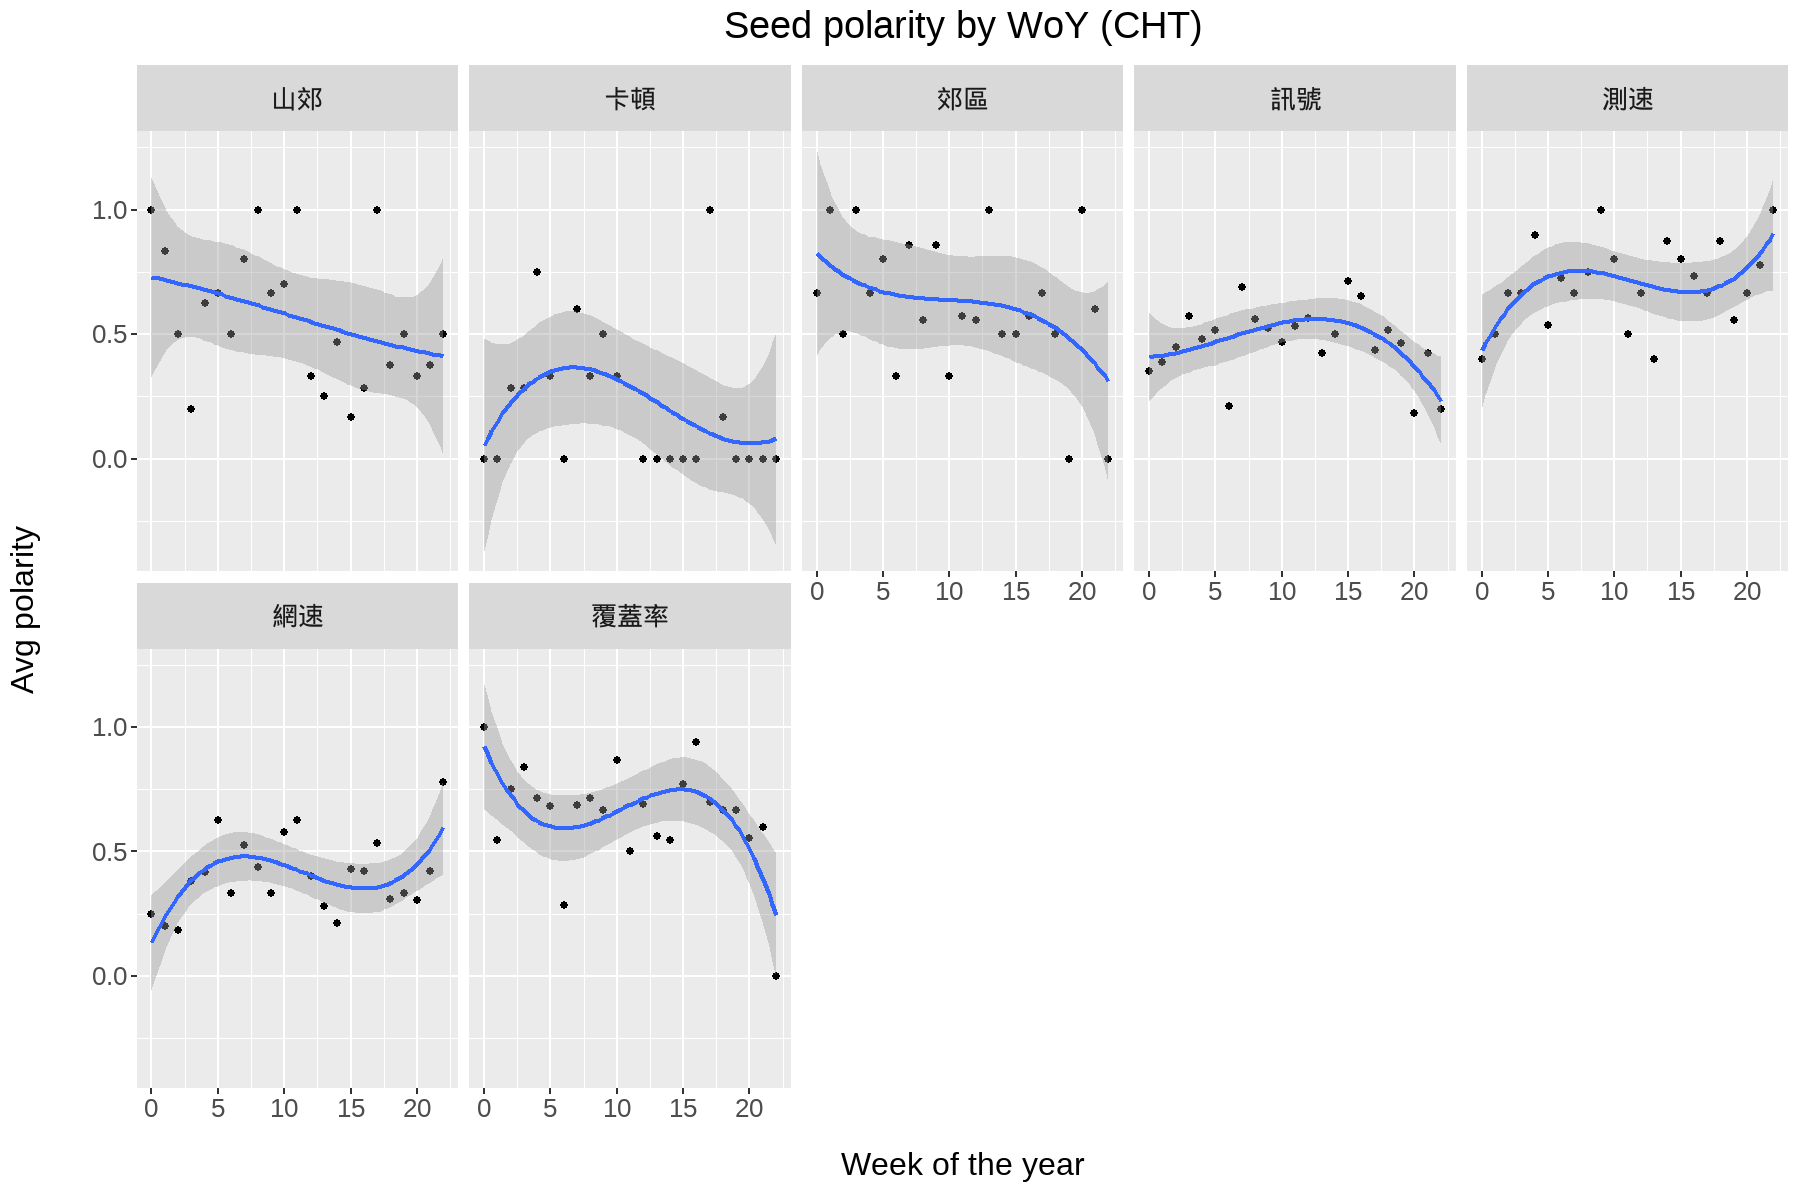

In [104]:
popt(12,8,150)
ggplot(data = seed_data %>% 
               group_by(seed, woy) %>% 
               filter(seed %in% strsplit("山郊,卡頓,郊區,訊號,測速,網速,覆蓋率", ",")[[1]]) %>% 
               summarise(mean=mean(rating, na.rm=T), .groups="drop"),
      aes(x=woy, y=mean)) + 
geom_point() + geom_smooth(method="lm", formula="y~poly(x, 3)", se=1) + 
labs(y="Avg polarity", x="Week of the year", title="Seed polarity by WoY (CHT)") + 
facet_wrap(vars(seed), ncol=5) + 
scale_color_brewer(palette="Set2", guide=guide_legend(nrow=1)) + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5))

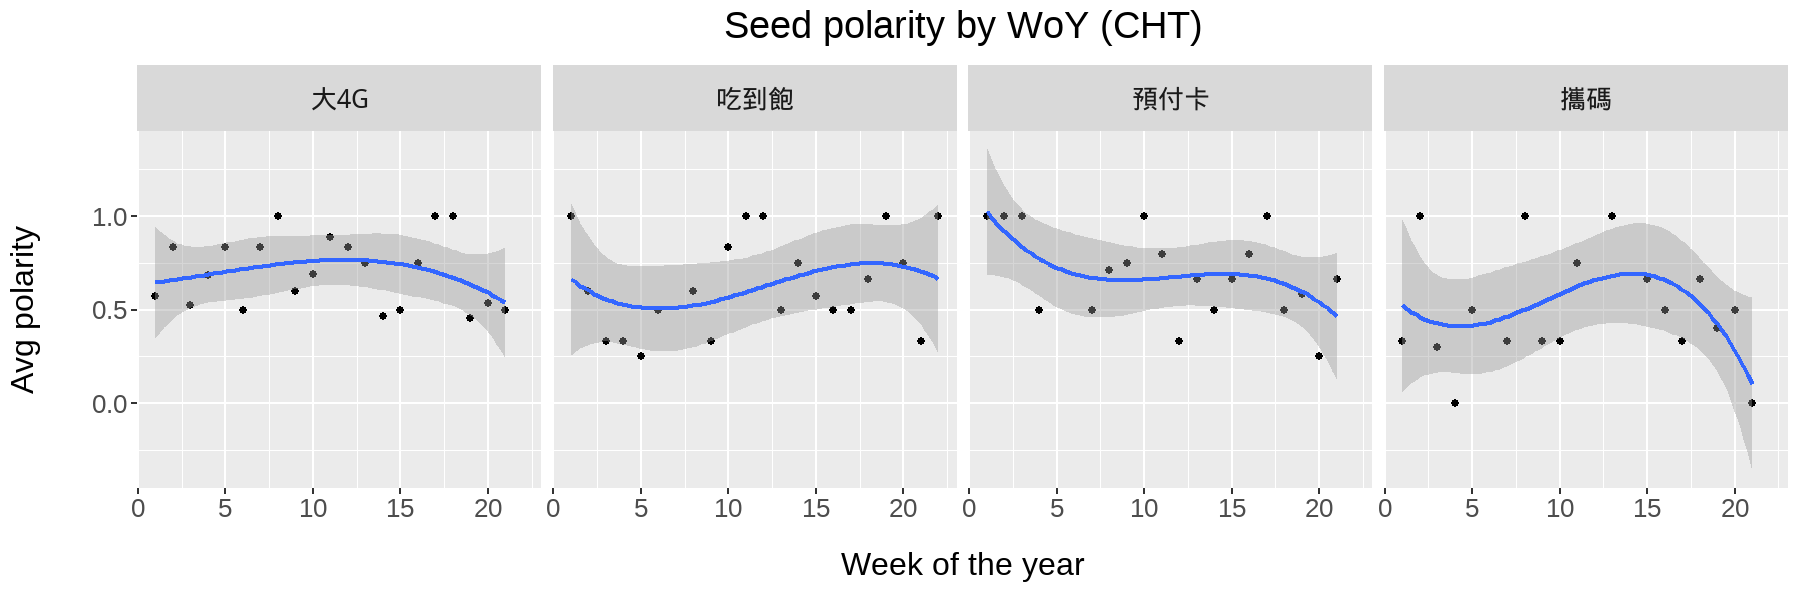

In [99]:
popt(12,4,150)
ggplot(data = seed_data %>% 
               group_by(seed, woy) %>% 
               filter(seed %in% strsplit("大4G,吃到飽,預付卡,攜碼", ",")[[1]]) %>% 
               summarise(mean=mean(rating, na.rm=T), .groups="drop"),
      aes(x=woy, y=mean)) + 
geom_point() + geom_smooth(method="lm", formula="y~poly(x, 3)", se=1) + 
labs(y="Avg polarity", x="Week of the year", title="Seed polarity by WoY (CHT)") + 
facet_wrap(vars(seed), nrow=1) + 
scale_color_brewer(palette="Set2", guide=guide_legend(nrow=1)) + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5))